# End to End Project - Estimate wine quality
## Task: Estimate wine quality Estimate wine quality.

List of predictors:

fixed acidity

volatile acidity

citric acid

residual sugar

chlorides

free sulfur dioxide

total sulfur dioxide

density

pH

sulphates

alcohol

quality (score between 0 and 10) – Dependent variable.

Suggestions:

Divide the dataset into training and test dataset in the ratio 75:25 choosing random or stratified

## Load data and set up 
**Import necessary libraries and packages**

In [84]:
# Ensure right setup python, sklearn
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

# Packages for Computation  
import numpy as np
import pandas as pd

# Packages for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

# Packages for structured modelling and pre-processing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV


# Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

# Metrics
from sklearn.metrics import mean_squared_error


**Import / load data**<br>
Check basic details, such as head, shape, features, data types etc

In [85]:
wineData = pd.read_csv('wineData.csv')
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [86]:
wineData.shape

(1599, 12)

In [87]:
wineData.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [88]:
wineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [89]:
wineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Some initial observations:**<br>
1. Data seems to have 1599 observations with 11 predictors that will help predict 'quality'
2. Relatively small data set with all numeric variables
3. Dependent variables seems to have only a finite range from 3-8. We could use this aspect to build a multi label classification model as well.
4. Standardizing the variables should prove effective given the different ranges of the numerical predictors

## Split data into test and train
This is to avoid being biased by data in the test set and keep it separate right from the start. Even avoiding it for EDA<br><br>
Splitting 75:25 as per requirement.

In [90]:
from sklearn.model_selection import train_test_split

wineData_train, wineData_test = train_test_split(wineData, test_size=0.25, random_state=42)

In [91]:
print(wineData_train.shape)
print(wineData_test.shape)

(1199, 12)
(400, 12)


In [92]:
x_train = wineData_train.drop("quality", axis = 1)
y_train = wineData_train["quality"].copy()

Create a copy of the data and work with this from now on

In [93]:
data_train = wineData_train.copy()

## EDA
Check for null values

In [94]:
wineData.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Seems like there are no missing values. Saves us some overhead<br><br>
Let us look at the correlation of predictors with the dependent variable and other predictors.<br>
Since the data set has very few predictors we will use corr plot.

In [95]:
# sns.pairplot(data_train)

That didn't really help much.<br> 
However we now know that the dependent variable takes finite integer values 3,4,5,6,7,8 and most of the wines (observations) that we have in our data are a 5 or 6. This could be problematic if we do not have sufficient records to train wines with quality 3,4,8<br><br>

Let us look at the correlations between the various predictors

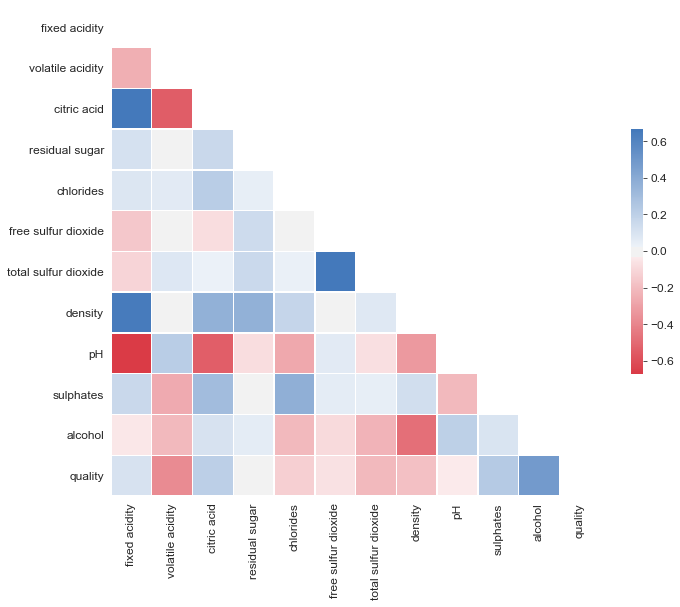

In [96]:
corr = data_train.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Seems like there are a lot of predictors that have a high correlation with each other. Some of them are
1. pH and acidity
2. density and fixed acidity
3. citric acid with fixed acidity and volatile acidity
4. free SO2 and total SO2<br><br>
Let us look at how each of these features corelate with the target variable in more detail.


In [97]:
corr_matrix = data_train.corr()
corr_matrix['quality'].sort_values(ascending =False)

quality                 1.000000
alcohol                 0.486792
sulphates               0.235271
citric acid             0.206397
fixed acidity           0.110242
residual sugar          0.011826
pH                     -0.033872
free sulfur dioxide    -0.064670
chlorides              -0.130010
density                -0.182739
total sulfur dioxide   -0.209141
volatile acidity       -0.375529
Name: quality, dtype: float64

Based on the corr plot previously seen, We can expect features to have a high multi-collinearity given the above which can be problematic when running linear regression.<br><br>
Let us try to confirm if we indeed have a problem with multi-colliniearity

In [98]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# x_trainD = data_train.drop("quality", axis =1)

# vif = pd.DataFrame()
# vif['VIF'] = [variance_inflation_factor(x_trainD.values, i) for i in range(x_trainD.shape[1])]
# vif['Feature'] = x_trainD.columns
# vif.round(1)

As can be seen from the above, Variance inflation factor wis really high for ph, density, pH, alcohol and fixed acidity in that order.<br>
Let us see if we can drop some of these after constructing useful features out of them so as to not loose their predictive power.<br>
1. Given alcohol, citric acid and acidity both free and volatile it makes sense that the pH would / could be infered from these. Let us replace pH and density by a single feature pH/density
2. Free and total SO2 seem to be highly correlated maybe a ration of free to total SO2 would be a single feature that could take both into account<br><br>
Let see what this would look like on the corr plot

In [99]:
new_df = data_train.copy()

new_df['densityByPH'] = new_df['density']/new_df['pH']
new_df['alcoholByPH'] = new_df['alcohol']/new_df['pH']
new_df['freeByTotalSO2'] = new_df['free sulfur dioxide']/new_df['total sulfur dioxide']
new_df["alcoholByVolAcidity"] = new_df["alcohol"]/new_df["volatile acidity"]
new_df["alcoholBySulphates"] = new_df["alcohol"]/new_df["sulphates"]
new_df.drop(['density', 'pH', 'free sulfur dioxide', 'total sulfur dioxide'], axis = 1, inplace=True)

corr_matrix = new_df.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                1.000000
alcoholByPH            0.496900
alcohol                0.486792
alcoholByVolAcidity    0.438763
sulphates              0.235271
citric acid            0.206397
freeByTotalSO2         0.205882
fixed acidity          0.110242
densityByPH            0.025294
residual sugar         0.011826
alcoholBySulphates    -0.101481
chlorides             -0.130010
volatile acidity      -0.375529
Name: quality, dtype: float64

In [100]:
new_df["alcoholByVolAcidity"].describe()

count    1199.000000
mean       22.316048
std         9.557714
min         6.898734
25%        15.583495
50%        19.583333
75%        26.493243
max        99.166667
Name: alcoholByVolAcidity, dtype: float64

In [101]:
# xNew = StandardScaler().fit_transform(new_df.drop('quality', axis=1))
# Lreg = LinearRegression()
# Lreg.fit(xNew, new_df['quality'])

# lin_prediction = Lreg.predict(xNew)
# lin_mse = mean_squared_error(new_df['quality'], lin_prediction)
# lin_rmse = np.sqrt(lin_mse)
# lin_rmse

In [102]:
# rf = RandomForestRegressor()
# rf.fit(xNew, new_df['quality'])

# rf_predictions = rf.predict(xNew)
# # lin_reg_predictions_rounded = [np.round(num) for num in lin_reg_predictions]
# rf_mse = mean_squared_error(new_df['quality'], rf_predictions)
# rf_rmse = np.sqrt(rf_mse)
# rf_rmse

In [103]:
# xgReg = xgb.XGBRegressor()
# xgReg.fit(xNew, new_df['quality'])

# xgReg_predictions = xgReg.predict(xNew)
# # lin_reg_predictions_rounded = [np.round(num) for num in lin_reg_predictions]
# xgReg_mse = mean_squared_error(new_df['quality'], xgReg_predictions)
# xgReg_rmse = np.sqrt(xgReg_mse)
# xgReg_rmse

Let us try to look at how the mean of the predictors are distributed wrt quality. This should hopefully give us a better idea.

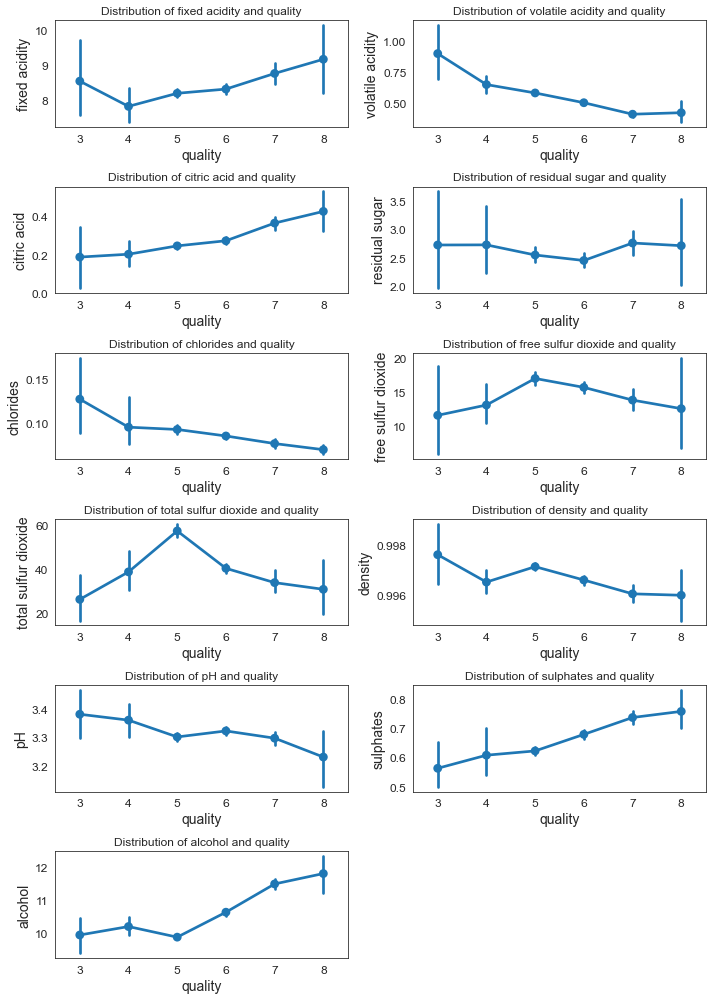

In [104]:
num_feat = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

plt.figure(figsize=(10, 14))
plotTitle = "Distribution of %s and quality"
i = 0
for col in num_feat:
    i+=1
    plt.subplot(6,2,i)
    sns.pointplot(x="quality", y= col , data=data_train)
    plt.title(plotTitle % (col)) 
    plt.tight_layout()
    

This gives us rough and high level estimate of the central tendancy of various predictors and the dependent variable.<br><br>
1. Acidic properties in general - fixed acidity, volatile acidity, citric acid do seem to have a substantial effect on quality
2. The same seems true with desnity and ph and sulphates
3. Total and free sulphur dioxide seems to have more of a non linear realtionship with quality<br><br>

Since the above does not show the actual spread of the data , let us try to plot that and see if the same holds good

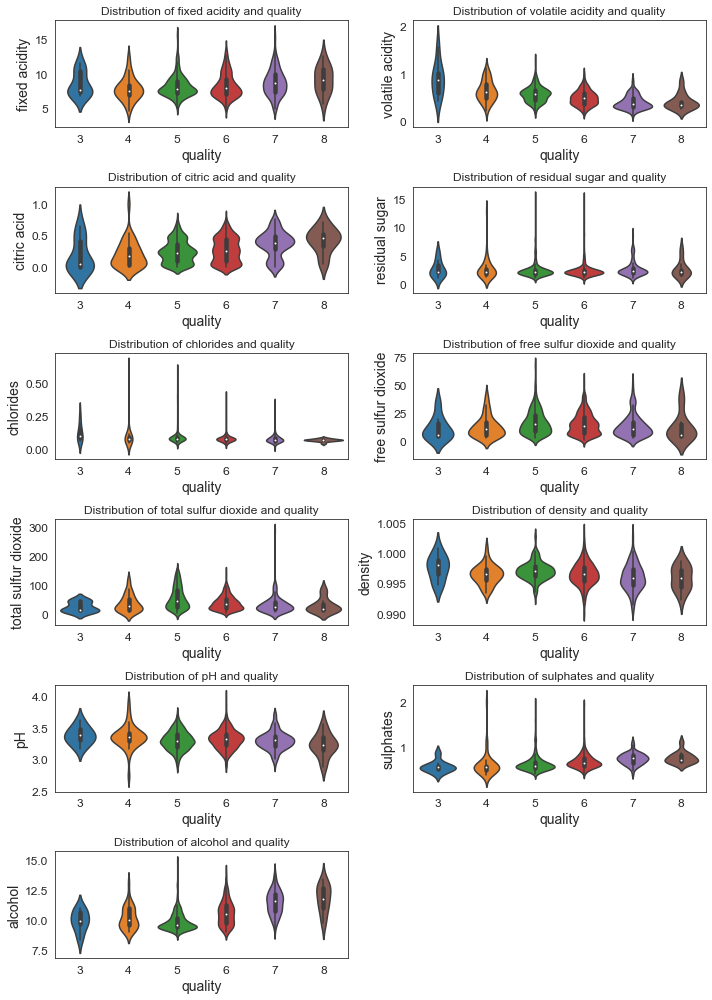

In [105]:
plt.figure(figsize=(10, 14))
plotTitle = "Distribution of %s and quality"
i = 0
for col in num_feat:
    i+=1
    plt.subplot(6,2,i)
    sns.violinplot(x="quality", y= col , data=data_train)
    plt.title(plotTitle % (col)) 
    plt.tight_layout()


It seems like a similar relationship exists with the distributions and median(white dot) as well.<br><br>
Let us try to create factors that might have a stronger relationship with the predictor.
1. Will try to create a ratio of " citric acid / volatile acid " (citricByVolatileAcid) The idea is to create a more diverging feature that hopefully contributes better towards the learning of the model. Lets see if it works.
2. Create a ratio of "citric acid / chlorides" (citricByChlorides) with simialr intent
3. Create a ratio of "alcohol / pH" (alcoholByPH) with simialr intent

In [106]:
# data_train["citricByVolatileAcid"] = data_train["citric acid"]/data_train["volatile acidity"]
# data_train["citricByChlorides"]  = data_train["citric acid"]/data_train["chlorides"]
# data_train["alcoholByPH"] = data_train["alcohol"]/data_train["pH"]
# data_train["fixedByVolatileAcidity"] = data_train["fixed acidity"]/data_train["volatile acidity"]
# data_train["freeByTotalSO2"] = data_train["free sulfur dioxide"]/data_train["total sulfur dioxide"]
# data_train["alcoholByVolAcidity"] = data_train["alcohol"]/data_train["volatile acidity"]
# data_train["totalSO2ByAlcohol"] = data_train["total sulfur dioxide"]/data_train["alcohol"]

# print(data_train.shape)

## Data prep for modeling
Let us now create a pipeline so that it is easy during modeling.<br>
Create a custom transformer to add extra features we came up with.<br>
We will also use a hyper parameter to decide whether to use the new features or not

In [107]:
from sklearn.base import BaseEstimator, TransformerMixin

# column indexes
density_ix, alcohol_ix, volAcidty_ix, pH_ix, freeSO2_ix, totalSO2_ix, sulphates_ix  = 7, 10, 1, 8, 5, 6, 9

# # columns to be droppped
# droppedColumns = [density_ix, pH_ix, freeSO2_ix, totalSO2_ix]

class FeaturesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, withNewFeatures = False): 
        self.withNewFeatures = withNewFeatures
        return None  
    
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        
        if self.withNewFeatures:
            densityByPH = X[:, density_ix] / X[:, pH_ix]
            alcoholByPH = X[:, alcohol_ix] / X[:, pH_ix]
            alcoholByVolAcidity = X[:, alcohol_ix] / X[:, volAcidty_ix]
            freeByTotalSO2 = X[:, freeSO2_ix] / X[:, totalSO2_ix]
            
            return np.c_[X, densityByPH, alcoholByPH, alcoholByVolAcidity, freeByTotalSO2]
        
        else:
            return X

# feat_adder = FeaturesAdder()
# x_train_extra_feat = feat_adder.transform(x_train.values)

Integrate above FeaturesAdder into the pipeline along with standard scaler

In [108]:
base_pipeline = Pipeline([
        ('add_features', FeaturesAdder()),
        ('std_scaler', StandardScaler()),
    ])

feat_pipeline = Pipeline([
    ('add_features', FeaturesAdder(withNewFeatures= True)),
    ('std_scaler', StandardScaler()),
])

x_train_prepared = base_pipeline.fit_transform(x_train.values)
x1_train_prepared = feat_pipeline.fit_transform(x_train.values)

In [109]:
print("Shape of x_train wo new features: ", x_train_prepared.shape)
print("Shape of x1_train with new features: ", x1_train_prepared.shape)

Shape of x_train wo new features:  (1199, 11)
Shape of x1_train with new features:  (1199, 15)


In [110]:
y_train.shape

(1199,)

## Select appropriate model

We shall try several models with the prepared data.<br>
1. Use regression as a technique for predicting wine quality
2. Use mulit-label classification as a technique for predicting wine quality<br><br>

**Comparisions of Regression algorithms**<br><br>
Let us first try with the whole data set

Lin_Reg: 0.661767 (0.047315)
DT: 0.837603 (0.075390)
RF: 0.601917 (0.065529)
SVM: 0.666791 (0.039969)
[09:09:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:09:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:09:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:09:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:09:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:09:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:09:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:09:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated 

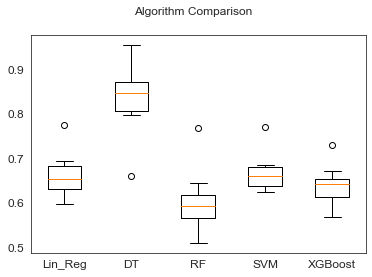

In [111]:
# prepare configuration for cross validation test harness
seed = 42

# prepare models
models = []
models.append(('Lin_Reg', LinearRegression()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('SVM', SVR(kernel="linear")))
models.append(('XGBoost', xgb.XGBRegressor()))


# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_squared_error'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = np.sqrt(-1*cross_val_score(model, x_train_prepared, y_train, cv=kfold, scoring=scoring))
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Let us now try this with the new features we derived

Lin_Reg: 0.663305 (0.045500)
DT: 0.790012 (0.061592)
RF: 0.597383 (0.054897)
SVM: 0.665791 (0.041981)
[09:09:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:09:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:09:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:09:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:09:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:09:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:09:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:09:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated 

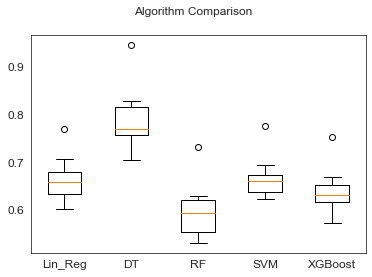

In [112]:
# prepare configuration for cross validation test harness
seed = 42

# prepare models
models = []
models.append(('Lin_Reg', LinearRegression()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('SVM', SVR(kernel="linear")))
models.append(('XGBoost', xgb.XGBRegressor()))


# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_squared_error'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = np.sqrt(-1*cross_val_score(model, x1_train_prepared, y_train, cv=kfold, scoring=scoring))
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

While the CV score isn't really much different, we can see that the Std deviation of the CV score is much less in the model with new features. I think this is good and we shall hence proceed with this.<br><br>
Seems like Random Forest and XGB are the way to go with this data set. Linear regression is a close 3rd<br>
We can now try building our models based on RF and XGB algorithms. 

### Linear regression

In [113]:
lin_reg = LinearRegression()
lin_reg.fit(x1_train_prepared, y_train)

LinearRegression()

In [114]:
lin_reg_predictions = lin_reg.predict(x1_train_prepared)
# lin_reg_predictions_rounded = [np.round(num) for num in lin_reg_predictions]
lin_mse = mean_squared_error(y_train, lin_reg_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6509459931627295

### Random Forest

In [115]:
rf = RandomForestRegressor()
rf.fit(x1_train_prepared, y_train)

RandomForestRegressor()

In [116]:
rf_predictions = rf.predict(x1_train_prepared)
# lin_reg_predictions_rounded = [np.round(num) for num in lin_reg_predictions]
rf_mse = mean_squared_error(y_train, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

0.22083113153994918

**Optimise model for best parameters**<br>
https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/
<br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [117]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'n_estimators': [50, 100, 150, 200],
    'max_features': [7, 8, 9],
    'max_depth': [5, 7, 9],
    'min_samples_split': [2, 5, 7],
    'max_samples': [0.1, 0.15, 0.2, 0.25]
}]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds
grid_search = GridSearchCV(forest_reg, param_grid, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(x1_train_prepared, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_depth': [5, 7, 9], 'max_features': [7, 8, 9],
                          'max_samples': [0.1, 0.15, 0.2, 0.25],
                          'min_samples_split': [2, 5, 7],
                          'n_estimators': [50, 100, 150, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [118]:
grid_search.best_params_

{'max_depth': 9,
 'max_features': 9,
 'max_samples': 0.25,
 'min_samples_split': 5,
 'n_estimators': 200}

In [119]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=9, max_features=9, max_samples=0.25,
                      min_samples_split=5, n_estimators=200, random_state=42)

In [120]:
grid_search.best_score_

-0.4056278879216529

In [121]:
-0.3951

-0.3951

In [122]:
# cvres = grid_search.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)
# pd.DataFrame(grid_search.cv_results_)

In [123]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# param_distribs = {
#     'n_estimators': randint(low= 50, high= 1000),
#     'max_features': randint(low= 3, high= 9),
#     'max_depth': randint(low= 3, high = 10),
#     'min_samples_split': randint(low = 2, high = 9),

# }
    
# forest_reg = RandomForestRegressor(random_state=42)
# rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
#                                 n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
# rnd_search.fit(x1_train_prepared, y_train)

In [124]:
# rnd_search.best_params_

In [125]:
# rnd_search.best_estimator_

In [126]:
# cvres = rnd_search.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)

In [127]:
# Convert np.ndarray to a data frame to view head

x1_train = pd.DataFrame(
    x1_train_prepared,
    columns= list(x_train.columns)+["densityByPH", "alcoholByPH", "alcoholByVolAcidity", "freeByTotalSO2"],
    index= wineData_train.index
 )

x1_train.head()

ValueError: Shape of passed values is (1199, 15), indices imply (1199, 14)

In [ ]:
features = x1_train.columns
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# feat_importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=x1_train.columns)
# feat_importances.plot(kind='barh')

# importances = grid_search.best_estimator_.feature_importances_
# std = np.std([tree.feature_importances_ for tree in grid_search.best_estimator_.estimators_],
#              axis=0)
# indices = np.argsort(importances)[::-1]

# # Print the feature ranking
# print("Feature ranking:")

# for f in range(x1_train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# # Plot the impurity-based feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(x1_train.shape[1]), importances[indices],
#         color="r", yerr=std[indices], align="center")
# plt.xticks(range(x1_train.shape[1]), indices)
# plt.xlim([-1, x1_train.shape[1]])
# plt.show()

**Check optimised model on Test data set**

In [ ]:
final_model = grid_search.best_estimator_

x_test = wineData_test.drop("quality", axis = 1)
y_test = wineData_test["quality"].copy()

X_test_prepared = feat_pipeline.fit_transform(x_test.values)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

### XG Boost

In [ ]:
xgReg = xgb.XGBRegressor()
xgReg.fit(x1_train_prepared, y_train)

In [ ]:
xgReg_predictions = xgReg.predict(x1_train_prepared)
# lin_reg_predictions_rounded = [np.round(num) for num in lin_reg_predictions]
xgReg_mse = mean_squared_error(y_train, xgReg_predictions)
xgReg_rmse = np.sqrt(xgReg_mse)
xgReg_rmse

Since we saw overfitting in case of RF model, with XGB, we will create a validation and set and monitor the loss.<br>
This will allow us to figure out where in the training the overfitting starts and then we can use early stopping.<br>
For the validation set, we will set aside 10% of the training data.

In [ ]:
# split training data into train and eval
X_trainXGB, X_evalXGB, y_trainXGB, y_evalXGB = train_test_split(x1_train_prepared, y_train, test_size=0.1, random_state=42)

print(X_trainXGB.shape)
print(X_evalXGB.shape)


In [ ]:
# fit model no training data

model = xgb.XGBRegressor()
eval_set = [(X_trainXGB, y_trainXGB), (X_evalXGB, y_evalXGB)]
model.fit(X_trainXGB, y_trainXGB, eval_metric=["rmse", "mae"], eval_set=eval_set, verbose=False)

# # make predictions for test data
# y_pred = model.predict(X_eval)
# predictions = [round(value) for value in y_pred]
# # evaluate predictions
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics

results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# plot rmse
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='eval')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

# plot mae
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='eval')
ax.legend()
plt.ylabel('MAE')
plt.title('XGBoost MAE')
plt.show()

From the above, it can be seen that after 20 epochs, the overfitting tends to start.<br>
We shall hence try to stop the model training at 20 epochs and use this as the final model and check the results.

In [ ]:
model = xgb.XGBRegressor()
model.fit(X_trainXGB, y_trainXGB, early_stopping_rounds=8, eval_metric="rmse", eval_set=eval_set, verbose=False)

In [ ]:
predictions = model.predict(X_test_prepared)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

Let us see if finetuning the xgb model helps get us a better result.

**Check optimised model on Test data set**

In [ ]:
xgb_param_grid = [{
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.001, 0.01, 0.1, 0.3],
    'max_depth': [7, 9, 12],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}]

xgb_reg = xgb.XGBRegressor(random_state=42, verbose=False)
# train across 5 folds
xgb_gridCV = GridSearchCV(xgb_reg, xgb_param_grid, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
xgb_gridCV.fit(x1_train_prepared, y_train)

In [ ]:
xgb_gridCV.best_score_

In [ ]:
xgb_gridCV.best_estimator_

In [ ]:
xgb_model = xgb_gridCV.best_estimator_
eval_set = [(X_trainXGB, y_trainXGB), (X_evalXGB, y_evalXGB)]
xgb_model.fit(X_trainXGB, y_trainXGB, eval_metric=["rmse", "mae"], eval_set=eval_set, verbose=False)

# # make predictions for test data
# y_pred = model.predict(X_eval)
# predictions = [round(value) for value in y_pred]
# # evaluate predictions
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics

results = xgb_model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# plot rmse
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='eval')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

# plot mae
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='eval')
ax.legend()
plt.ylabel('MAE')
plt.title('XGBoost MAE')
plt.show()

In [ ]:
xgb_model.fit(X_trainXGB, y_trainXGB, early_stopping_rounds=10, eval_metric="rmse", eval_set=eval_set, verbose=False)

In [ ]:
predictions = xgb_model.predict(X_test_prepared)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

Lets see if ensembling helps

In [ ]:
predictions = 0.8 *final_model.predict(X_test_prepared) + 0.2 * xgb_model.predict(X_test_prepared)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

Seems like an ensemble of Random forest and fine tuned XGB is able to achieve slightly better result than best model of random forest alone.<br>
We shall hence us this combination as our final model for predictions.

In [73]:
%%html
<style>
table {float:left}
</style>

| **Model**       | **Rmse Test** |
| :-----------:| :-----------: 
| Tuned RF    | 0.6001 |
| Tuned XGB   | 0.6329|
| Ensemble (0.8 RF, 0.2 XGB)| 0.598|

# Use classification

In [71]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [37]:
# split training data into train and eval
X_trainXGB, X_evalXGB, y_trainXGB, y_evalXGB = train_test_split(x1_train_prepared, y_train, test_size=0.1, random_state=42)

print(X_trainXGB.shape)
print(X_evalXGB.shape)

(1079, 15)
(120, 15)


In [76]:
model = XGBClassifier(n_estimators=600, learning_rate=0.05)
eval_set = [(X_trainXGB, y_trainXGB), (X_evalXGB, y_evalXGB)]
model.fit(X_trainXGB, y_trainXGB, early_stopping_rounds=200, eval_metric=["merror"], eval_set=eval_set, verbose=False)

XGBClassifier(learning_rate=0.05, n_estimators=600, objective='multi:softprob')

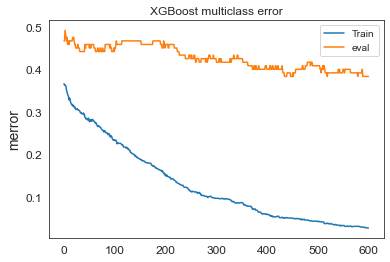

In [77]:
results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

# plot rmse
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='eval')
ax.legend()
plt.ylabel('merror')
plt.title('XGBoost multiclass error')
plt.show()

# # plot mae
# fig, ax = plt.subplots()
# ax.plot(x_axis, results['validation_0']['mae'], label='Train')
# ax.plot(x_axis, results['validation_1']['mae'], label='eval')
# ax.legend()
# plt.ylabel('MAE')
# plt.title('XGBoost MAE')
# plt.show()

In [67]:
x_test = wineData_test.drop("quality", axis = 1)
y_test = wineData_test["quality"].copy()

X_test_prepared = feat_pipeline.fit_transform(x_test.values)


In [78]:
predictions = model.predict(X_trainXGB)

accuracy = accuracy_score(y_trainXGB, predictions)
accuracy

0.9716571844231418

In [81]:
predictions = model.predict(X_test_prepared)

accuracy = accuracy_score(y_test, predictions)
accuracy

0.2798879708471641

In [82]:
predictions

array([5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 7, 5, 6, 7, 5, 5, 6,
       5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 7, 6, 7, 5, 5, 7, 5,
       6, 6, 6, 5, 5, 6, 5, 5, 6, 8, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 7, 5,
       7, 5, 7, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 7, 5, 5, 6, 6, 5, 6,
       7, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 6, 6, 5, 5, 5,
       6, 5, 7, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 7, 6, 7, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5,
       6, 6, 6, 7, 5, 6, 6, 5, 6, 5, 5, 6, 4, 5, 5, 5, 5, 5, 7, 6, 7, 6,
       6, 5, 5, 5, 5, 7, 5, 6, 5, 7, 6, 6, 7, 6, 7, 5, 5, 6, 5, 5, 5, 5,
       6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 8, 5, 6, 8, 6, 6, 6, 5, 6, 5,
       5, 6, 6, 6, 6, 5, 5, 7, 5, 5, 5, 5, 7, 6, 5, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 5, 7, 6, 5, 7, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6,
       6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 7, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 7, 6, 7, 5,

In [83]:
y_test

803     6
124     5
350     6
682     5
1326    6
       ..
1565    6
327     5
254     6
322     5
1160    7
Name: quality, Length: 400, dtype: int64

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pcaData = pca.fit_transform(X_trainFeat)